# Convolutional Neural Networks

#### Group members: Andrew Durette, Daniel Szabo, Hanjoo Lee

## Abstract

Convolutional Neural Networks (CNN) are a type of deep learning neural network that uses a mathematical operation called a Convolution in any of the layers of a neural network. The benefit of using a CNN is that it is computationally less complex than other types of Neural Networks due to how a Convolution functions. Due to this and many more properties of CNN, this kind of neural network has seen applications in statistics, signal processing, health sciences, etc.

Due to how useful CNN can be, the main purpose of this project is to give an introductary view of how individual components of CNN come together to function the way they do and give a small demonstration of how CNNs can be used in a real world application.

After participating in this project, students should be able to:

Understand what a convolutional neural network is:

○Structurally

- Be able to give examples of inputs (images), internal (convolution)layers, and output (classification or probability of classification)
    
○Mathematically

- Be able to use Convolution with filters to detect certain features

- Be able to use Training - backpropagation

- Forward pass, loss function, backward pass, weight update

○Computational advantages of using a CNN

- Give examples of applications of CNN such as image recognition, medical image analysis, audio recognition, etc.

- Understand how to implement a CNN with Keras

This project will involve an introduction to Convolution in the discrete time, a 2D case of a simple CNN demonstrating common parts of the neural network such as pooling, convolution, and its activation function. Then the project will give a brief example of CNN applied in a biomedical setting with an Electrocardiogram(ECG) data set from the MIT-BIH Arrythmia lab for detection of unhealthy features in an ECG waveform.

## Background

The general topic of Neural Networks were already described in class, however they were very heavily computationally complex due to the nature of the weights required to solve the neural networks. Some ethical discussions are made regarding the focus on the usefulness of such a Neural Network as it was only in recent decades that CNNs have taken off due to improvements of modern computers. Thus, it is left up for discussion whether or not CNNs will continue later in the future to be a useful Neural Network or surpassed by the improvement of technology.

This is where the CNN strengths lie in, the structure is inspired by the human body's visual cortex which can be represented as a 2D matrix, receiving stimulus at each point of the eye and looking for vertical or horizontal edges. This biological inspiration is then represented as a 2D Convolution that convolves the 2D image input the human eye receives and the multiple layers of neurons that are what process the information to the human brain. The Convolution is able to provide similar accuracy to other neural networks without needing as many weights.

## Intro to Convolution:

A convolution is a mathematical operation that generates a new function from the combination of two other functions. The way the combination is done is by essentially multiplying the two functions at a specific index n and shifting either function, but only one of them, as a function of k. The formulation looks like this:
	\begin{align}
\ y[n] & = x[n]*h[n] = \sum_{k=-\infty}^{\infty} x[n-k]h[k]  \\
\end{align}
graphically, in the discrete time for which we will be dealing in, it will look like one function sliding across another and computing a dot product between the two functions.


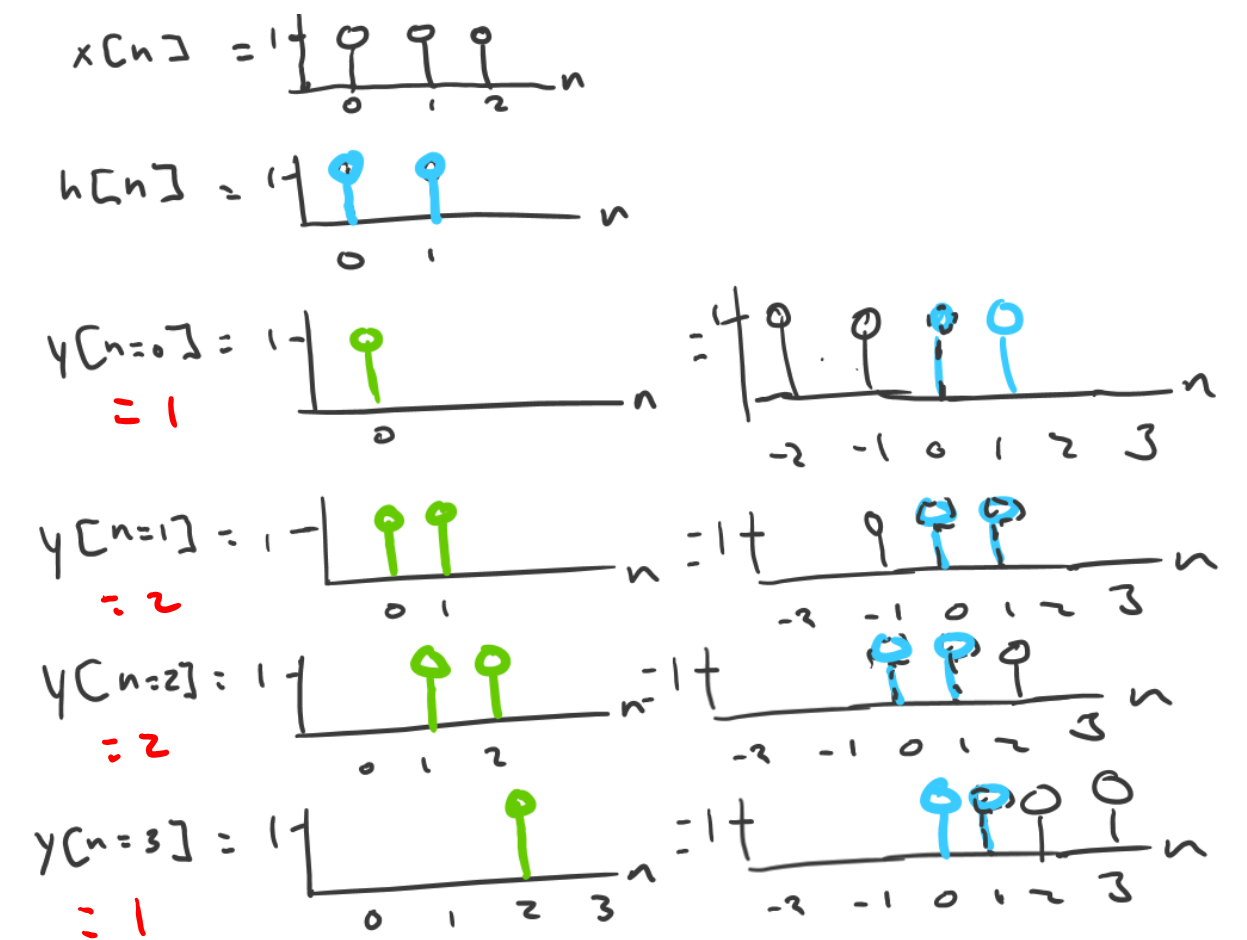

The diagram on the right of each y just shows how the two functions “slide” across one another, x[n] became a function of k as n is a constant picked for each y[n] so k slides x[n] across h[n] to do a dot product.

Convolution is used in many real-world applications, such as a frequency analysis tool in signal processing. In the case of CNN, we are combining the input we receive and the weights of the neural network to generate an algorithm that will activate neurons for classification. The x[n] being the input signal and our h[n] being the weights we are training.



### Activity 1

Problem 1:
This problem asks you to solve the y[n] given x[n] and h[k].


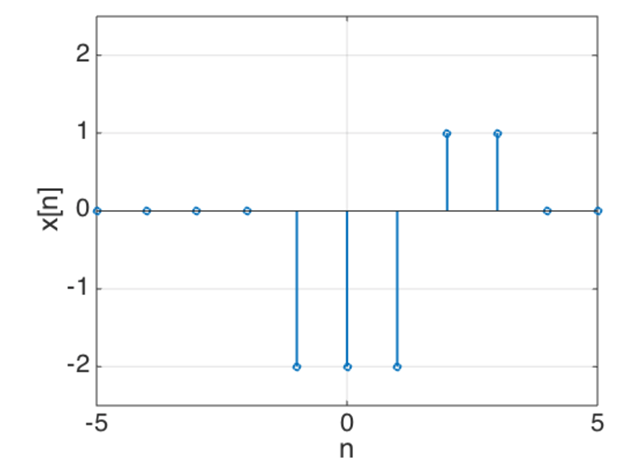

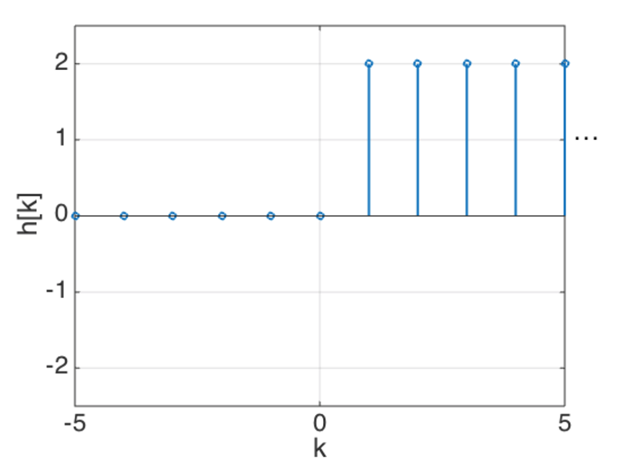

y[-2] = ??

y[0] = ??

y[1] = ??

y[2] = ??

y[3] = ??

y[10] = ??

y[100] = ??

Problem provided by ECE 330 convolution practice activity

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.misc import electrocardiogram
import sys


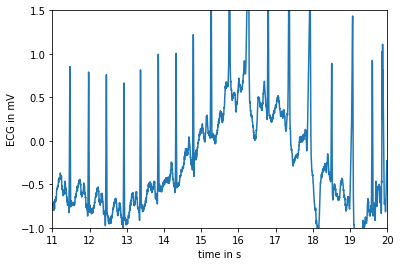

In [4]:
ecg = electrocardiogram();
fs = 360;
time = np.arange(ecg.size) / fs;
plt.plot(time, ecg);
plt.xlabel("time in s");
plt.ylabel("ECG in mV");
plt.xlim(11, 20);
plt.ylim(-1, 1.5);
plt.show();

#Code Provided by scipy package

###### ECG File Courtesy of MIT-BIH

In [8]:
# Convolution for a 1D image and filter with stride = 1
def convolution1D(image, filt):
    # Set up output array
    outDim = image.shape[0] - (filt.shape[0] - 1)
    out = np.zeros((outDim))

    filtLen = len(filt)

    for i in range(outDim):
        for j in range(filtLen):
            out[i] = out[i] + image[i + j]*filt[j]
    
    return out

image = np.array([1,2,3,4,5,6,7,8,9,10])
filt = np.array([.5,.5])

result = convolution1D(image, filt)
print(result)

[1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


## CNN Example - Image Processing
The functions below implement different elements that construct a single layer in a CNN:
- Convolution
- Pooling (we're using max pooling)
- Activation function (we're using ReLU)

In [33]:
"""
Convolutional neural network layer functions. Implemented with numpy.
Code adapted from online article "Building Convolutional Neural Network using Numpy from Scratch" by Ahmed Gad
Article can be found here: https://towardsdatascience.com/building-convolutional-neural-network-using-numpy-from-scratch-b30aac50e50a
For article source code: https://github.com/ahmedfgad/NumPyCNN
"""

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on 
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

def conv(img, conv_filter):

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.
    

def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                            np.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = np.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in np.arange(0,feature_map.shape[0]):
            for c in np.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
    return relu_out


## CNN Example - Input Image
Now we will use the skimage tool to import a picture of cat. We will use this image as input data to our CNN and use 2 filters for feature detection. One filter will be for detecting horizontal edges and the other will be for detecting vertical edges.
Run the script below to import and view the example cat image.

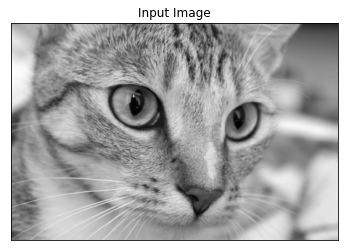

In [29]:
import skimage.data
import matplotlib

# Reading the image - a cat
img = skimage.data.chelsea()

# Converting the image into gray.
img = skimage.color.rgb2gray(img)

# Graphing results
fig0, ax0 = plt.subplots(nrows=1, ncols=1)
ax0.imshow(img).set_cmap("gray")
ax0.set_title("Input Image")
ax0.get_xaxis().set_ticks([])
ax0.get_yaxis().set_ticks([])
plt.show()

A beautiful creature, eh? According to the database, her name is Chelsea. 
## CNN Example - Layer 1
The script below assembles the first layer of our CNN. First we create our two filters for horizontal and vertical edge detection. Feature Map1 resembles the vertical edge filter while feature Map2 is the horizontal filter. 
- So first we perform the convolution of the filters over the input image and create a feature map. 
- Next, that feature map is put through the ReLU activation function to change any negative values to 0. 
- Finally, the output of the ReLU step is put through the max pooling function where the size of the image is reduced by only keeping the highest value within 2x2 matrix.

**Working with convolution layer 1**
**ReLU**
**Pooling**
**End of conv layer 1**



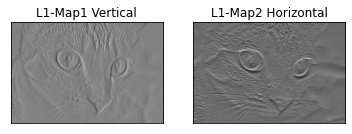

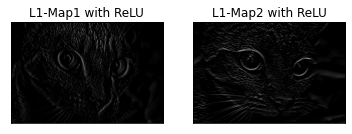

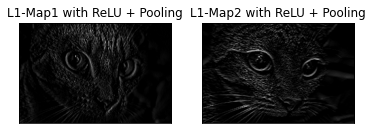

In [34]:
# First conv layer
l1_filter = numpy.zeros((2,3,3))

# Vertical edge detection
l1_filter[0, :, :] = np.array([[[-1, 0, 1], 
                                [-1, 0, 1], 
                                [-1, 0, 1]]])
# Horizontal edge detection
l1_filter[1, :, :] = np.array([[[1,   1,  1], 
                                [0,   0,  0], 
                                [-1, -1, -1]]])

print("**Working with convolution layer 1**")
l1_feature_map = conv(img, l1_filter)
print("**ReLU**")
l1_feature_map_relu = relu(l1_feature_map)
print("**Pooling**")
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
print("**End of conv layer 1**\n")

# Layer 1
fig1, ax1 = plt.subplots(nrows=1, ncols=2)
ax1[0].imshow(l1_feature_map[:, :, 0]).set_cmap("gray")
ax1[0].get_xaxis().set_ticks([])
ax1[0].get_yaxis().set_ticks([])
ax1[0].set_title("L1-Map1 Vertical")

ax1[1].imshow(l1_feature_map[:, :, 1]).set_cmap("gray")
ax1[1].get_xaxis().set_ticks([])
ax1[1].get_yaxis().set_ticks([])
ax1[1].set_title("L1-Map2 Horizontal")
plt.show()

fig11, ax11 = plt.subplots(nrows=1, ncols=2)
ax11[0].imshow(l1_feature_map_relu[:, :, 0]).set_cmap("gray")
ax11[0].get_xaxis().set_ticks([])
ax11[0].get_yaxis().set_ticks([])
ax11[0].set_title("L1-Map1 with ReLU")

ax11[1].imshow(l1_feature_map_relu[:, :, 1]).set_cmap("gray")
ax11[1].get_xaxis().set_ticks([])
ax11[1].get_yaxis().set_ticks([])
ax11[1].set_title("L1-Map2 with ReLU")
plt.show()

fig12, ax12 = plt.subplots(nrows=1, ncols=2)
ax12[0].imshow(l1_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax12[0].get_xaxis().set_ticks([])
ax12[0].get_yaxis().set_ticks([])
ax12[0].set_title("L1-Map1 with ReLU + Pooling")

ax12[1].imshow(l1_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax12[1].get_xaxis().set_ticks([])
ax12[1].get_yaxis().set_ticks([])
ax12[1].set_title("L1-Map2 with ReLU + Pooling")
plt.show()


## CNN Example - Layer 2
The second layer of our CNN uses 3 filters with randomly generated values. The use of random numbers is common practice at the initialization of the newtork since training with backpropogation will adjust the weights within the filter to detect the most influencial features of the image. An important reminder is that the output of the first layer of our CNN is used as the input to the second layer. And the output of the second layer will be used as the input for the third layer, and so on through your CNN. The output from this layer will show 3 different feature maps due to the use of 3 filters. Though it physically seems the same size, the image is of smaller size (looks like less resolution) with each layer because of the reduction from max pooling. This aids in computation speed and the isolation of features of interest for efficient classification.


**Working with conv layer 2**
**ReLU**
**Pooling**
**End of conv layer 2**



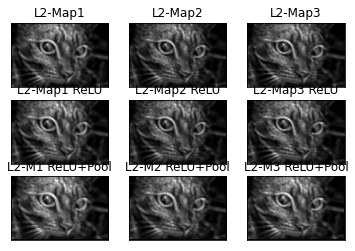

In [38]:
# Second conv layer
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("**ReLU**")
l2_feature_map_relu = relu(l2_feature_map)
print("**Pooling**")
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)
print("**End of conv layer 2**\n")

# Layer 2
fig2, ax2 = plt.subplots(nrows=3, ncols=3)
ax2[0, 0].imshow(l2_feature_map[:, :, 0]).set_cmap("gray")
ax2[0, 0].get_xaxis().set_ticks([])
ax2[0, 0].get_yaxis().set_ticks([])
ax2[0, 0].set_title("L2-Map1")

ax2[0, 1].imshow(l2_feature_map[:, :, 1]).set_cmap("gray")
ax2[0, 1].get_xaxis().set_ticks([])
ax2[0, 1].get_yaxis().set_ticks([])
ax2[0, 1].set_title("L2-Map2")

ax2[0, 2].imshow(l2_feature_map[:, :, 2]).set_cmap("gray")
ax2[0, 2].get_xaxis().set_ticks([])
ax2[0, 2].get_yaxis().set_ticks([])
ax2[0, 2].set_title("L2-Map3")

ax2[1, 0].imshow(l2_feature_map_relu[:, :, 0]).set_cmap("gray")
ax2[1, 0].get_xaxis().set_ticks([])
ax2[1, 0].get_yaxis().set_ticks([])
ax2[1, 0].set_title("L2-Map1 ReLU")

ax2[1, 1].imshow(l2_feature_map_relu[:, :, 1]).set_cmap("gray")
ax2[1, 1].get_xaxis().set_ticks([])
ax2[1, 1].get_yaxis().set_ticks([])
ax2[1, 1].set_title("L2-Map2 ReLU")

ax2[1, 2].imshow(l2_feature_map_relu[:, :, 2]).set_cmap("gray")
ax2[1, 2].get_xaxis().set_ticks([])
ax2[1, 2].get_yaxis().set_ticks([])
ax2[1, 2].set_title("L2-Map3 ReLU")

ax2[2, 0].imshow(l2_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax2[2, 0].get_xaxis().set_ticks([])
ax2[2, 0].get_yaxis().set_ticks([])
ax2[2, 0].set_title("L2-M1 ReLU+Pool")

ax2[2, 1].imshow(l2_feature_map_relu_pool[:, :, 1]).set_cmap("gray")
ax2[2, 1].get_xaxis().set_ticks([])
ax2[2, 1].get_yaxis().set_ticks([])
ax2[2, 1].set_title("L2-M2 ReLU+Pool")

ax2[2, 2].imshow(l2_feature_map_relu_pool[:, :, 2]).set_cmap("gray")
ax2[2, 2].get_xaxis().set_ticks([])
ax2[2, 2].get_yaxis().set_ticks([])
ax2[2, 2].set_title("L2-M3 ReLU+Pool")
plt.show()


## CNN Example - Layer 3
Our third and final layer only uses 1 filter with randomly generated values, thus the output will only be a single feature map. Since the input to layer 3 (from layer 2) is 3 different feature maps, the single, layer 3 filter will be applied to each input map and the values will be summed up for the same coordinate positions of the image. This way we can take the input from each map from layer 2 and analyze the collective features for each filter in layer 3 (only one in this case). As you can guess, adding more filters allows for detection of more features but adds to processing time. After running the script below, you will see the single feature map output. The output has an even smaller size, again from pooling. As you go deeper into a CNN, the network detects "bigger picture" features. In the beginning we detect simple edges, a detail found in many places. By the end of a deep network, the CNN could detect features such as eyes or whiskers, ultimately detailing the classification that this is an image of a cat. Our beloved Chelsea.


**Working with conv layer 3**
**ReLU**
**Pooling**
**End of conv layer 3**



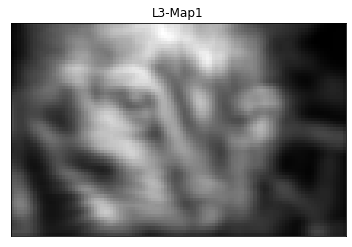

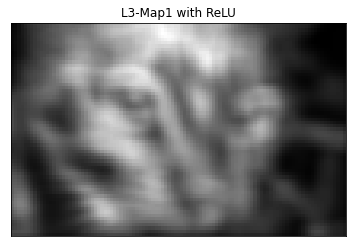

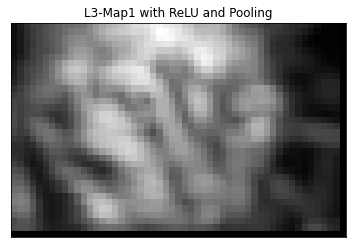

In [24]:
# Third conv layer
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
print("**ReLU**")
l3_feature_map_relu = relu(l3_feature_map)
print("**Pooling**")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
print("**End of conv layer 3**\n")

# Layer 3
fig30, ax30 = plt.subplots(nrows=1, ncols=1)
ax30.imshow(l3_feature_map[:, :, 0]).set_cmap("gray")
ax30.get_xaxis().set_ticks([])
ax30.get_yaxis().set_ticks([])
ax30.set_title("L3-Map1")
plt.show()

fig31, ax31 = plt.subplots(nrows=1, ncols=1)
ax31.imshow(l3_feature_map_relu[:, :, 0]).set_cmap("gray")
ax31.get_xaxis().set_ticks([])
ax31.get_yaxis().set_ticks([])
ax31.set_title("L3-Map1 with ReLU")
plt.show()

fig32, ax32 = plt.subplots(nrows=1, ncols=1)
ax32.imshow(l3_feature_map_relu_pool[:, :, 0]).set_cmap("gray")
ax32.get_xaxis().set_ticks([])
ax32.get_yaxis().set_ticks([])
ax32.set_title("L3-Map1 with ReLU and Pooling")
plt.show()

# CNN Demonstration for QRS Detection
Finally we can try to apply what we have learned with CNN's to what we have about heartbeats. Here, we use the MIT-BIH Arrhythmea database, which has many long samples of peoples' heartbeats, along with annotations about any medication or conditions they might have. As the process described in the attached paper is a bit complicated, we figured we could simply try and find which heart rates showed symptoms of AV blockage. AV blockage is a dangerous condition that may lead to anything from light-headedness to sudden cardiac arrest. We read around 48 files from the MIT-BIH database, and looked through the annotations to see which of them showed symptoms of AV blockage. Then, we trained a convolutional neural network with keras to learn how to decide whether a given heart is at risk of heart failure or not. Unfortunately you can't run keras on the CAE Jupyter servers, but feel free to try running it locally, or just understand some of what the program is doing. Our results are below as well.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from scipy.io import loadmat

# Load the data
nums = range(100, 235)
dat = list()
y = []
for num in nums:
    try:
        dat.append(loadmat('/home/daniel/Downloads/QRS_DAT/mat_dat/' + str(num) + 'm.mat'))
        with open('/home/daniel/Downloads/QRS_DAT/physionet.org/files/mitdb/1.0.0/' + str(num) + '.hea') as f:
            if 'AV block' in f.read():  # Looking for AV blocks
                y.append(1)
            else:
                y.append(0)
    except:
        continue

# Smooth the data with a simple moving average
def smooth(dataframe, old_df, name, k):
    data = old_df[name][0]
    for i in range(len(data)):
        if i >= k:
            dataframe[name][0][i] = dataframe[name][0][i - 1] + (data[i] - data[i - k]) / k
        else:
            if i == 0:
                dataframe[name][0][i] = data[i]
            else:
                dataframe[name][0][i] = (dataframe[name][0][i - 1] * (i - 1) + data[i]) / i


def run(y, dat):
    # Continue collecting data
    newd = list()
    for d in dat:
        new_dat = d.copy()
        smooth(new_dat, d, 'val', 5)  # smooth each data value
        newd.append(new_dat)
    y = np.asarray(y)
    trainInds = np.random.choice(size=int(3*len(y)/4), a=np.arange(len(y)))  # Take a random subset for training and evaluation
    evalInds = np.random.choice(size=int(3*len(y)/4), a=np.arange(len(y)))  # Take a random subset for training and evaluation
    trainY = y[trainInds]
    evalY = y[evalInds]
    X = np.asarray([np.asarray([int(v) for v in d['val'][0]]) for d in newd])
    trainX = X[trainInds]
    evalX = X[evalInds]

    # Create Neural Net using recommendations from online sources
    inp = layers.Input(shape=(3600, 1))
    x = layers.Conv1D(32, 5, activation='relu')(inp)
    x = layers.Conv1D(16, 3, activation='relu')(x)
    x = layers.Dropout(.5)(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inp, output)

    # Compile the network with 'adam' optimizer (supposed to work better than SGD) and appropriate loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    # Fit the data in 10 epochs
    model.fit(trainX, trainY, epochs=10, batch_size=15, verbose=0)

    # Evaluate data
    losses, accuracy = model.evaluate(evalX, evalY, batch_size=15, verbose=0)

    print("Run accuracy " + str(accuracy))
    return accuracy

# Find the average quality over multiple runs
tot = 0
for i in range(5):
    acc = run(y, dat)
    tot += acc
print("total accuracy: " + str(tot/5))
exit(0)

## Output:
Run accuracy 0.8857142925262451<br>
Run accuracy 0.8285714387893677<br>
Run accuracy 0.800000011920929<br>
Run accuracy 0.9428571462631226<br>
Run accuracy 0.9428571462631226<br>
total accuracy: 0.8800000071525573

## Solutions

Activity 1:

y[-2] = 0 
y[0] = -4 
y[1] = -8 
y[2] = -12 
y[3] = -10 
y[10] = -8 
y[100] = -8 


## References:

    1.  Mahapattanakul, P. From Human Vision to Computer Vision — Convolutional Neural Network(Part3/4). https://becominghuman.ai/from-human-vision-to-computer-vision-convolutional-neural-network-part3-4-24b55ffa7045, Accessed April 2020, Nov 10, 2019 

    2. Ahmed Gad. Building Convolutional Neural Network using NumPy from Scratch. https://towardsdatascience.com/building-convolutional-neural-network-using-numpy-from-scratch-b30aac50e50a. Accessed April 2020. Jun 27, 2018

    3. Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209)
    
    4. Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.
    
    5. TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensor- flow.org.
    
    6. Xiang Y, Lin Z, Meng J. Automatic QRS complex detection using two-level convolutional neural network. hhttps://www.ncbi.nlm.nih.gov/pubmed/29378580, January 2018 
    